<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import datetime as dt

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", sep = ";", skiprows=3, skipfooter=16, engine="python")
dados.drop(columns = "Total", axis = 1, inplace = True)
dados.drop(index = 19,axis=0, inplace = True)
dados_st = dados.melt(id_vars="Ano Diagnóstico", var_name= 'Mes',value_name="casos", value_vars=dados.columns[1:13])


In [18]:
mes_map= {'Jan': "01",
          'Fev': "02",
          'Mar': "03",
          'Abr': "04",
          'Mai': "05",
          'Jun': "06",
          'Jul': "07",
          'Ago': "08",
          'Set': "09",
          'Out': "10",
          'Nov': "11",
          'Dez': "12"}

dados_st['Mes_n'] = dados_st['Mes'].map(mes_map)
dados_st["Data"] = pd.to_datetime(dados_st["Mes_n"] + "/" + dados_st["Ano Diagnóstico"])
dados_st.sort_values("Data",inplace=True)


In [7]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ano Diagnóstico  228 non-null    object        
 1   Mes              228 non-null    object        
 2   casos            228 non-null    int64         
 3   Mes_n            228 non-null    object        
 4   Data             228 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 9.0+ KB


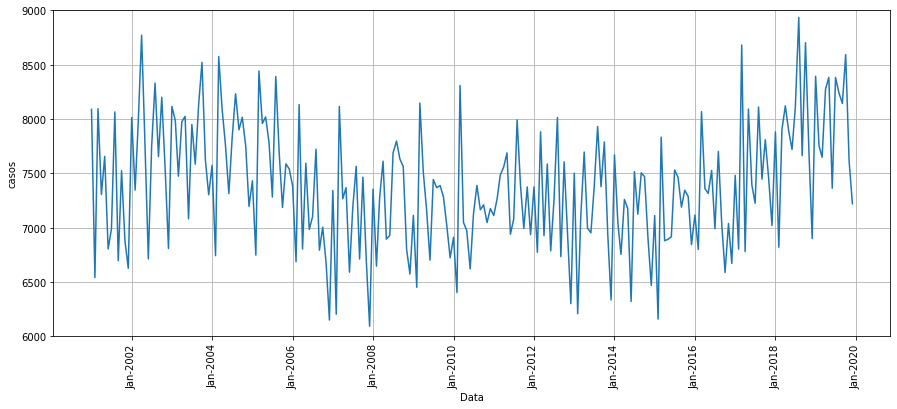

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize = (15,6)) 
plt.xticks(rotation=90)
plt.ylim(6000,9000)
plt.grid()
ax = sns.lineplot(data = dados_st ,x = "Data", y = "casos")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))


In [17]:
dados_st[0:12]

,Ano Diagnóstico,Mes,casos,Mes_n,Data
0,2001,Jan,8088,01,2001-01-01
1,2002,Jan,8013,01,2002-01-01
2,2003,Jan,8115,01,2003-01-01
3,2004,Jan,7574,01,2004-01-01
4,2005,Jan,7432,01,2005-01-01
5,2006,Jan,7385,01,2006-01-01
6,2007,Jan,7342,01,2007-01-01
7,2008,Jan,7355,01,2008-01-01
8,2009,Jan,7113,01,2009-01-01
9,2010,Jan,6912,01,2010-01-01
